In [4]:
#Call ONE of the following to import:
%run hide_toggle.ipynb
########OR########
#import import_ipynb
#from hide_toggle import hide_toggle
hide_toggle()

# Sinusoids: review

In this lesson we'll look at the components of sinusoids, how to graph them, and how to manipulate them.

In [5]:
from IPython.display import Math, Image
import numpy as np
import matplotlib.pyplot as plt
%run hide_toggle.ipynb
#%config InlineBackend.figure_format = 'svg'
#matplotlib.rcParams['figure.figsize'] = (8, 6)

### In the context of sound, what does this wave represent? (Or perhaps: what do the values along the x and y axes represent?)

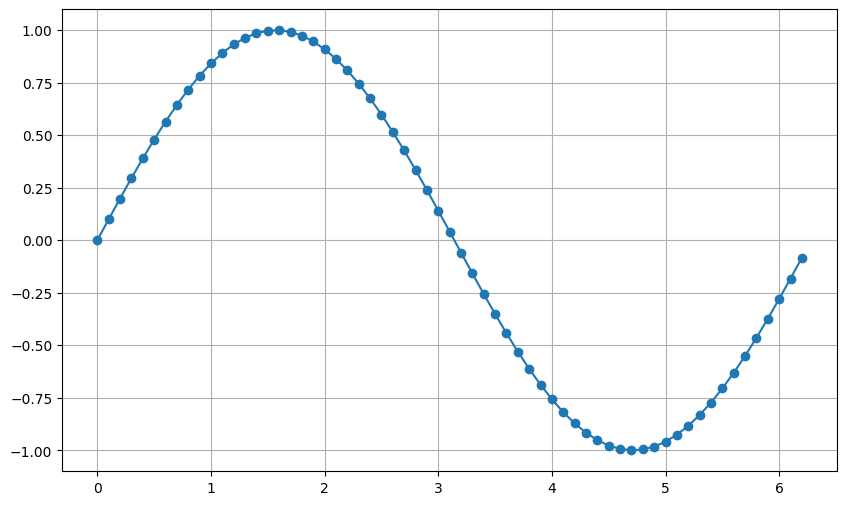

In [6]:
x = np.arange(0, 2*np.pi, 0.1)
y = np.sin(x)
plt.figure(figsize=(10,6));
plt.plot(x, y, marker='o');
plt.grid(True, which='both');

hide_toggle()

* When values are above y=0, the pressure of the air increases (air is moving toward you)
* When values are below y=0, the pressure of the air decreases (air is moving away from you)

This change in pressure we refer to as the *amplitude* and is what is plotted on the y-axis. Amplitude is related to loudness. We can think of the relation between amplitude and loudness as similar to the relation between frequency and pitch: One is acoustic, the other is auditory (i.e., perceptual).

Technically, we measure amplitude in volts, pressure, or even just integers: it doesn’t really matter. We just want to be able to look at the overall displacement, or relative position of the values. Typically, we will use integers normalized to the range of between -1 and 1.

A single sinusoid is periodic and symmetrical.
Recall the **period** is the distance from one maximum (or minimum) to the next (or the length of one complete cycle).
**Frequency** is the number of cycles (or periodicity) per second.

**Why does this sine wave not *look* like a sine wave?**

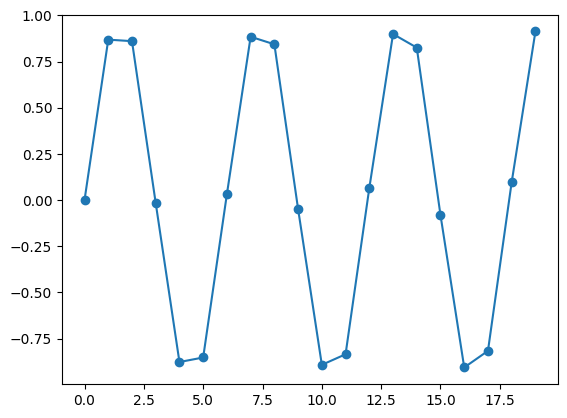

In [7]:
vals = np.linspace(0,20,20)
x = np.sin(vals)
plt.plot(x, marker="o")
hide_toggle()

Let's increase the sampling rate to effectively "increase the resolution" on our sine wave:

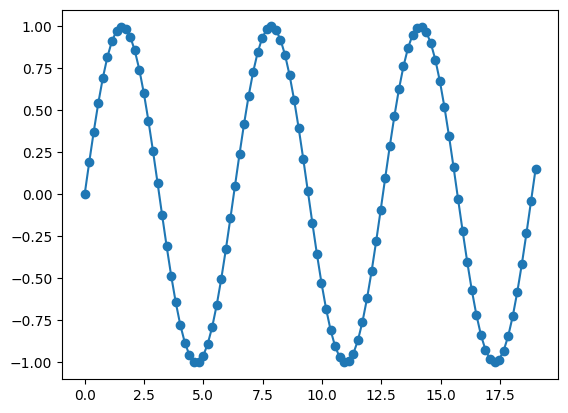

In [8]:
vals_highres = np.linspace(0,19,100) #recall difference between 'arange' and 'linspace' functions
newx = np.sin(vals_highres)
plt.plot(vals_highres, newx, marker="o")
hide_toggle()

### The Sine Function

Sine is a function for modeling a smooth oscillation between -1 and 1 (unit circle of radius 1). It starts at 0, grows to 1 (the max), through 0 down to -1 (the min) and back to 0.

So sin(x) depends on the value(s) of x. But what does x represent? And where does frequency come in?

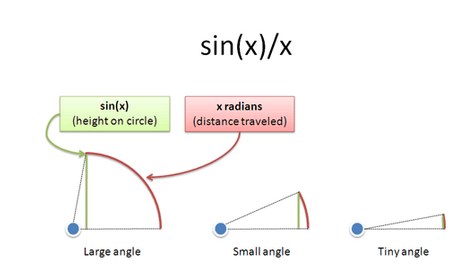

In [9]:
#Taken from suggested reading: https://betterexplained.com/articles/intuitive-guide-to-angles-degrees-and-radians/ 
Image('../images/sinusoids.png', embed=True,   )

In the equation: $sin(x)$ :

    * x is how far you traveled along a unit circle (a distance in radians)
    * sin(x) is your height on the circle 

**Recall that the general mathematical form of a single sinusoidal signal is:**

$$x(t) = A sin(\omega_{0}t + \phi)$$

Where $A$ is amplitude, $\omega_{0}$ is frequency in radians/s (radian frequency or angular frequency), t is a time index (usually *array* of time points), and $\phi$ is the phase (or starting angle offset) in radians.

Radians measure angles by distance traveled over time (usually per second unless otherwise stated):

$$Radians = \frac{distance\ traveled}{radius}$$

You'll often see this written as "theta equal to arc length over radius", or:

$$\theta = \frac{s}{r}$$ 

one radian is about 360 /(2 * $\pi$) or 57.3 degrees

How do we get radian frequency and how does it relate to frequency in Hertz?

It takes 2*pi radians to complete one full cycle (or pi units to go from zero to max; or start to mid-cycle), and frequency is just the number of full cycles per second.


So we can simply multiply $2pi$ by frequency in Hz:

$2pi *$ [radians/cycle] $* f$ [cycles/second] = $\omega_{0}$ [radians per second]

and Amplitude is simply the size of the radius.

Thus, in radians per second, the frequencies of the first four As on the piano keyboard are:

* 2π x 55 =~ 345 
* 2π × 110 =~ 691
* 2π × 220 =~ 1382
* 2π × 440 =~ 2764


Note: We can identify the two representations of a moment (or single point in) a sine wave through two formulas: a polar formula (which consists of a *magnitude* - r (or radius), and an *angle in radians* - theta), or a rectangular forumla (which is expressed through a complex number), so:
(r, theta) --> (x,y)

$x = a + jb$

or in polar coordinates:

$(r, \theta), where \\
r = (\sqrt{x^2+y^2}) \\
\theta = (\arctan 2\frac{b}{a})$

We won't need to get into this immediately...some of you may already be familiar.

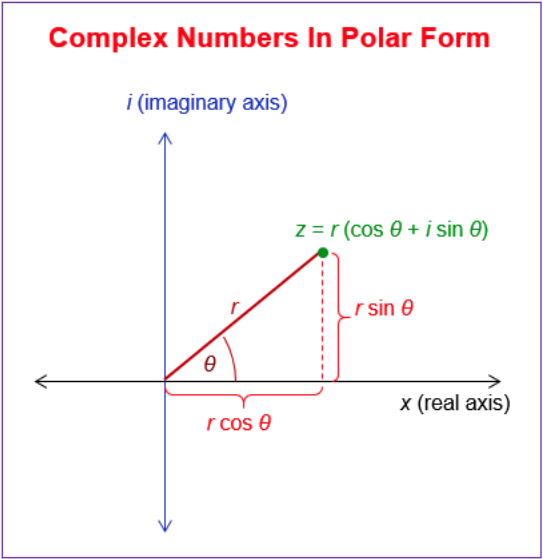

In [10]:
Image('../Images/polarRectangular.png', width=400, embed=True)

## Multi-dimensional data (a bit more numpy)

- Numpy arrays can hold multi-dimensional data. This is useful since audio files typically have multiple channels (i.e., left and right). So when we read in an audio file with 2 channels, we will have a multidimensional array.

- To create a multi-dimensional array, we can pass a list of lists to the `array()` function:

In [11]:
x = np.array([[1,2], [3,4]])
x

array([[1, 2],
       [3, 4]])

## Arrays containing arrays

- A multi-dimensional array is an array of an arrays.

- The outer array holds the rows.

- Each row is itself an array:

In [12]:
#x = np.array([[1,2], [3,4]])
x[0]

array([1, 2])

- So the element in the second row, and first column is:  
(Recall python indexing starts at zero)

In [13]:
x[1][0]

3

## Matrices

- We can also create a matrix from a multi-dimensional array. We won't use matrices much, but this is useful to know, especially for plotting multidimensional data.

In [14]:
M = np.matrix(x)
M

matrix([[1, 2],
        [3, 4]])

## Plotting multi-dimensional with matrices

- If we supply a matrix to `plot()` then it will plot the y-values taken from the *columns* of the matrix (notice the transpose in the example below).

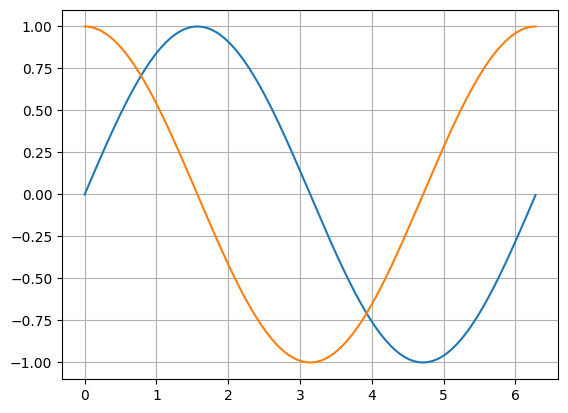

In [15]:
x = np.arange(0, 2*np.pi, 0.01)    
y = np.sin(x)
M = np.matrix([np.sin(x), np.cos(x)])
plt.plot(x, M.T) # the .T is required to transpose the matrix to correct orientation.
plt.grid(True, which='both')

Of course, you don't need to put it in a matrix to plot. You can actually pass multiple items to plt.plot:

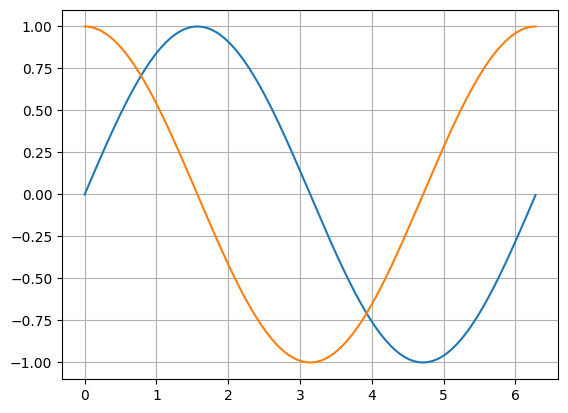

In [16]:
plt.plot(x, np.sin(x), x, np.cos(x))
plt.grid(True)

Rather than just pass a time series to a sin or cos function, we can excert greater control over the parameters by adjusting the arguments.

First, let's construct a real sinusoid.

We can see from the last graph that the default phase is 0, the default amplitude is 1 and the default angle is 2\*pi (or one complete cycle). 

In [17]:
A = .8 #amplitude
f0 = 100 #frequency in Hz
phi = np.pi/2 #initial phase angle in radians (i.e., starting point)
fs = 44100 #sampling rate. We'll come back to this.
t = np.arange(-0.002, 0.002, 1/fs) #set up our time indices


#Formula for real sinusoid
x = A * np.cos(2*np.pi * f0 * t + phi) #remember t is a numpy array, so the multiplication (and addition) will be applied to the vector.

In [18]:
t

array([-2.00000000e-03, -1.97732426e-03, -1.95464853e-03, -1.93197279e-03,
       -1.90929705e-03, -1.88662132e-03, -1.86394558e-03, -1.84126984e-03,
       -1.81859410e-03, -1.79591837e-03, -1.77324263e-03, -1.75056689e-03,
       -1.72789116e-03, -1.70521542e-03, -1.68253968e-03, -1.65986395e-03,
       -1.63718821e-03, -1.61451247e-03, -1.59183673e-03, -1.56916100e-03,
       -1.54648526e-03, -1.52380952e-03, -1.50113379e-03, -1.47845805e-03,
       -1.45578231e-03, -1.43310658e-03, -1.41043084e-03, -1.38775510e-03,
       -1.36507937e-03, -1.34240363e-03, -1.31972789e-03, -1.29705215e-03,
       -1.27437642e-03, -1.25170068e-03, -1.22902494e-03, -1.20634921e-03,
       -1.18367347e-03, -1.16099773e-03, -1.13832200e-03, -1.11564626e-03,
       -1.09297052e-03, -1.07029478e-03, -1.04761905e-03, -1.02494331e-03,
       -1.00226757e-03, -9.79591837e-04, -9.56916100e-04, -9.34240363e-04,
       -9.11564626e-04, -8.88888889e-04, -8.66213152e-04, -8.43537415e-04,
       -8.20861678e-04, -

In [19]:
len(t)

177

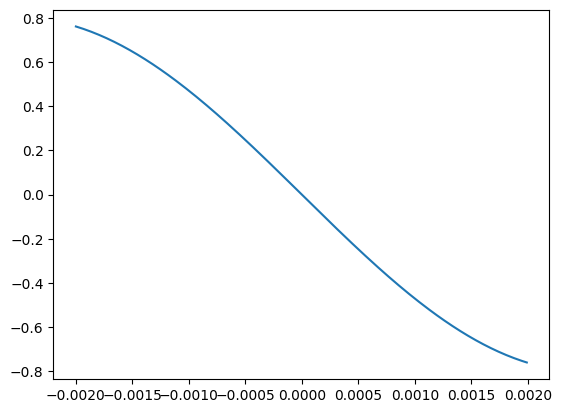

In [20]:
plt.plot(t,x)

Since the sampling rate is 44,100 per second, and we have a total of 177 samples, we can figure out that if we wanted to plot a single cycle to fit the number of samples, we need to change the frequency to ???. Change the frequency (above) to [fill in the blank] to see the single cycle.

What is the difference between a real and complex sinusoid?

Recall that complex numbers have two components or two parts: a real part and an imaginary part. 

So, a *complex* sinusoid contains both the real and imaginary parts.


Recall Euler's identity:

In [21]:
Math(r'e^{j \theta} = cos(\theta) + j sin(\theta)')

<IPython.core.display.Math object>

Multiplying this equation by $ A \geq 0$ and setting $ \theta = \omega t + \phi$, where $ \omega$ is radian frequency,  $ t$ is time in seconds, and $ \phi$ is a phase offset, we obtain what we call the complex sinusoid: 

In [22]:
Math(r'A e^{j(\omega t + \phi)} = A cos(\omega t + \phi) + j A sin(\omega t+\phi)')

<IPython.core.display.Math object>

Thus, the sinusoidal motion $ \cos(\omega t)$ is the projection of the circular motion $ e^{j\omega t}$ onto the $ x$ (real-part) axis, while $ \sin(\omega t)$ is the projection of $ e^{j\omega t}$ onto the $ y$ (imaginary-part) axis. 

In [23]:
N = 500
k = 3
n = np.arange(-N/2, N/2)

In [24]:
s = np.exp(1j * 2 * np.pi * k * n / N)

We cannot display a complex sinusoid using a 2D representation, but we can plot the real and imaginary parts separately, or on top of each other.

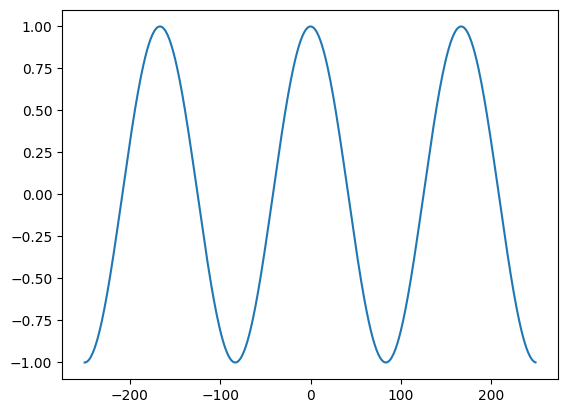

In [25]:
plt.plot(n, np.real(s))

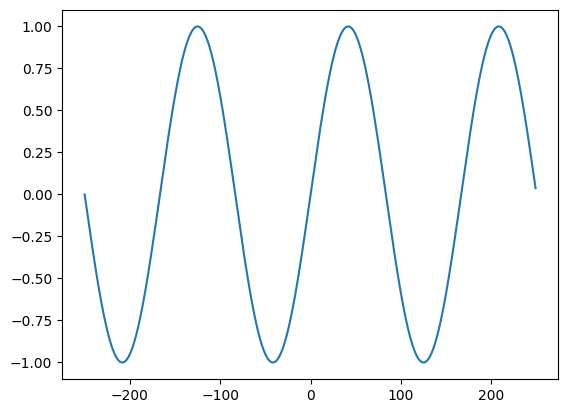

In [26]:
plt.plot(n,np.imag(s))

If you don't have a matrix but have two numpy arrays of the same length, you can plot both in a single call to plot, like this:

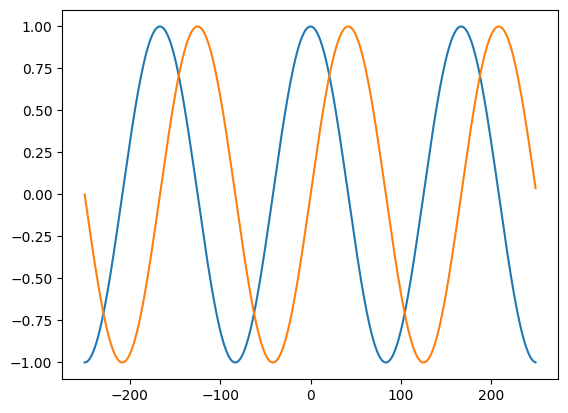

In [27]:
plt.plot(n, np.real(s), n, np.imag(s))
hide_toggle()